In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style="whitegrid")
from sklearn.cluster import KMeans


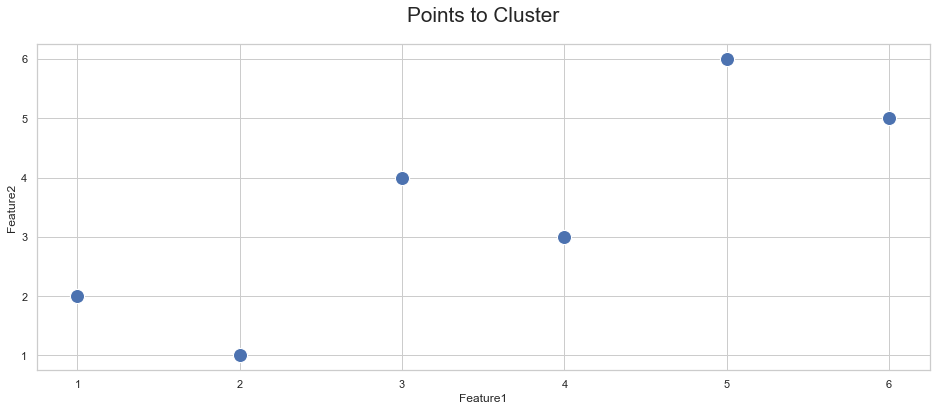

In [3]:
# DataFrame with two features and sample names
df = pd.DataFrame({
    "Sample Name": ["Sample "+str(i) for i in range(6)],
    "Feature1": [6, 5, 1, 2, 3, 4],
    "Feature2": [5, 6, 2, 1, 4, 3],
})

# Show
df

# Dataframe 2D Plot
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(data=df, x="Feature1", y="Feature2", s=200)
ax.set_title("Points to Cluster", fontsize='xx-large', y=1.05);

In [5]:
kms = KMeans(n_clusters=3, random_state=1).fit(df[['Feature1', 'Feature2']])
df['Cluster'] = kms.labels_
df['Cluster Centroid D1'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
df['Cluster Centroid D2'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
df

,Sample Name,Feature1,Feature2,Cluster,Cluster Centroid D1,Cluster Centroid D2
0,Sample 0,6,5,2,5.5,5.5
1,Sample 1,5,6,2,5.5,5.5
2,Sample 2,1,2,1,1.5,1.5
3,Sample 3,2,1,1,1.5,1.5
4,Sample 4,3,4,0,3.5,3.5
5,Sample 5,4,3,0,3.5,3.5


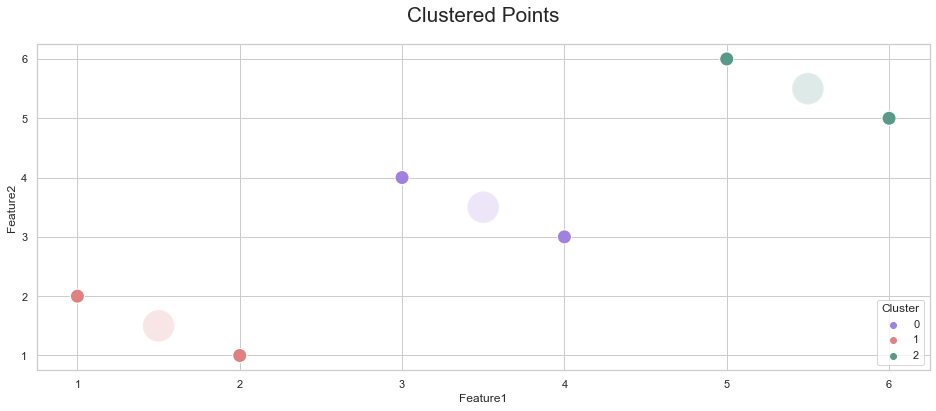

In [6]:
plt.figure(figsize=(16, 6))
colors = ["#A181E0", "#E08181", "#599988"]
ax = sns.scatterplot(data=df, x="Feature1", y="Feature2", hue='Cluster', 
                     s=200, palette=colors, legend=True)
ax = sns.scatterplot(data=df, x="Cluster Centroid D1", y="Cluster Centroid D2", hue='Cluster', 
                     s=1000, palette=colors, legend=False, alpha=0.1)

plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

In [7]:
features = df.columns.tolist()[1:-1]
print(f"Features: \n{features}")

centroids = kms.cluster_centers_
print(f"Centroids \n{centroids}")

# Features:
#     ['Feature1', 'Feature2']
# Centroids:
#     [[3.5 3.5]
#      [1.5 1.5]
#      [5.5 5.5]]

Features: 
['Feature1', 'Feature2', 'Cluster', 'Cluster Centroid D1']
Centroids 
[[3.5 3.5]
 [1.5 1.5]
 [5.5 5.5]]


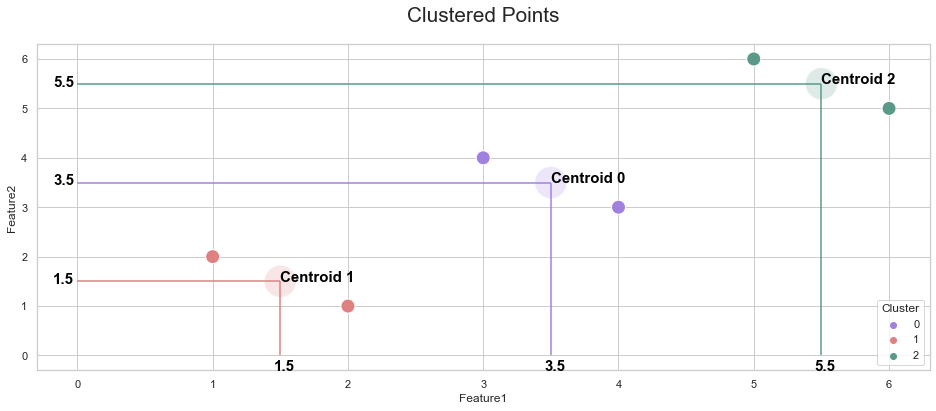

In [33]:
plt.figure(figsize=(16, 6))
colors = ["#A181E0", "#E08181", "#599988"]
ax = sns.scatterplot(data=df, x="Feature1", y="Feature2", hue='Cluster', 
                     s=200, palette=colors, legend=True)
ax = sns.scatterplot(data=df, x="Cluster Centroid D1", y="Cluster Centroid D2", hue='Cluster', 
                     s=1000, palette=colors, legend=False, alpha=0.1)
# add the label of the centroids to the plot
# add the xvline and yvline of centroids to the plot 
for i in range(centroids.shape[0]):
    ax.text(centroids[i, 0], centroids[i, 1], f"Centroid {i}",  
            size=15, color='black', weight='bold')
    ax.vlines(centroids[i, 0], ymin=0, ymax=centroids[i, 1], colors=colors[i])
    ax.hlines(centroids[i, 1], xmin=0, xmax=centroids[i, 0], colors=colors[i])
    # add number on the axis of the centroids
    ax.text(centroids[i, 0]-0.05, 0-0.3, f"{centroids[i, 0]}",
            size=15, color='black', weight='bold')
    ax.text(0-0.18, centroids[i, 1]-0.05, f"{centroids[i, 1]}",
            size=15, color='black', weight='bold')
    
    

plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

In [8]:
sorted_centroid_features_idx = centroids.argsort(axis=1)[:,::-1]
print(f"Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: \n{sorted_centroid_features_idx}")

print()

sorted_centroid_features_values = np.take_along_axis(centroids, sorted_centroid_features_idx, axis=1)
print(f"Sorted Feature/Dimension Values for Each Centroid in Descending Order: \n{sorted_centroid_features_values}")

# Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: 
# [[1 0]
#  [1 0]
#  [1 0]]

# Sorted Feature/Dimension Values for Each Centroid in Descending Order: 
# [[3.5 3.5]
#  [1.5 1.5]
#  [5.5 5.5]]

Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: 
[[1 0]
 [1 0]
 [1 0]]

Sorted Feature/Dimension Values for Each Centroid in Descending Order: 
[[3.5 3.5]
 [1.5 1.5]
 [5.5 5.5]]
